# Run Dynamic Programming and Q-learning for Simple Depolarize Problem

# Initialize Environment

In [ ]:
import env.fj_depolarize_simple as ds
import importlib
importlib.reload(ds)

n_nodes=5
k_steps=2
max_edges = 4

env = ds.DepolarizeSimple(n=n_nodes, k=k_steps, max_edges=max_edges)
print(f"Environment has {len(env.states)} unique states.")

Generating states: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

Environment has 2666 unique states.


# Run Dynamic Programming (Policy Iteration)

In [ ]:
import agents.dynamic_programming as dp
importlib.reload(dp)

agent_dp = dp.DynamicProgramming(env)
V, pi = agent_dp.run()

V and pi have been saved to 'saved files/dynamic_programming_solutions/dp_n5_k2.pkl'.


#### Save the value function and policy to a file


In [ ]:
import pickle

with open(f'saved files/dynamic_programming_solutions/dp_n{n_nodes}_k{k_steps}.pkl', 'wb') as f:
    pickle.dump({'V': V, 'pi': pi}, f)
print(f"V and pi have been saved to 'saved files/dynamic_programming_solutions/dp_n{n_nodes}_k{k_steps}.pkl'.")

#### If saved earlier: Load fitted value function from file


In [35]:
import agents.dynamic_programming as dp
import pickle

with open(f'saved files/dynamic_programming_solutions/dp_n{n_nodes}_k{k_steps}.pkl', 'rb') as f:
    data = pickle.load(f)
    V = data['V']
    pi = data['pi']
agent_pol_it = dp.DynamicProgramming(env, V=V, pi=pi)
print(f"Loaded V and pi from 'saved files/dynamic_programming_solutions/dp_n{n_nodes}_k{k_steps}.pkl'.")

Loaded V and pi from 'saved files/dynamic_programming_solutions/dp_n4_k2.pkl'.


# Run Q-learning

In [ ]:
import agents.q_learning as q_learning
importlib.reload(q_learning)

agent_qlearning = q_learning.QLearning(env)

q_table = agent_qlearning.train(
    n_training_episodes=100000,
    min_epsilon=0.2,
    max_epsilon=1.0,
    decay_rate=0.000005,
    learning_rate=1
)

<module 'agents.q_learning' from '/Users/louistichelman/Documents/Uni/Masterarbeit/Playground/agents/q_learning.py'>

#### Save the Q-table to a file

In [55]:
import pickle

with open(f'saved files/q_learning_solutions/q_n{n_nodes}_k{k_steps}.pkl', 'wb') as f:
    pickle.dump(q_table, f)
print(f"Q-table has been saved to 'saved files/q_learning_solutions/q_n{n_nodes}_k{k_steps}.pkl'.")

Q-table has been saved to 'saved files/q_learning_solutions/q_n5_k2.pkl'.


#### If saved earlier, load Q-table from file

In [68]:
import pickle
import agents.q_learning as q_learning

with open(f'saved files/q_learning_solutions/q_n{n_nodes}_k{k_steps}.pkl', 'rb') as f:
    q_table = pickle.load(f)

agent_qlearning = q_learning.QLearning(env)
agent_qlearning.q_table = q_table
print("Q-table has been loaded and agent initialized.")

Q-table has been loaded and agent initialized.


# Evaluate Policy

### 1 - Compute optimal solutions for every starting state

In [62]:
from tqdm import tqdm
import utils.evaluation as ev
importlib.reload(ev)

optimal_solutions = {}

for state in tqdm(env.starting_states, desc="Computing optimal solutions"):
    G_optimal, polarization_optimal = ev.depolarize_optimal(state, env)
    optimal_solutions[state] = (G_optimal, polarization_optimal)

with open(f'saved files/optimal_solutions/optimal_solutions_n{n_nodes}_k{k_steps}.pkl', 'wb') as f:
    pickle.dump(optimal_solutions, f)
print(f"Optimal solutions have been saved to 'saved files/optimal_solutions/optimal_solutions_n{n_nodes}_k{k_steps}.pkl'.")

Computing optimal solutions: 100%|██████████| 188/188 [00:03<00:00, 48.33it/s]

Optimal solutions have been saved to 'saved files/optimal_solutions/optimal_solutions_n5_k2.pkl'.


#### If saved earlier: Load optimal solutions from file

In [63]:
import pickle

with open(f'saved files/optimal_solutions/optimal_solutions_n{n_nodes}_k{k_steps}.pkl', 'rb') as f:
    optimal_solutions = pickle.load(f)
print("Optimal solutions have been loaded.")

Optimal solutions have been loaded.


### 2 - Compute number of optimal solutions for DP, Q-learning and Greedy Algorithm

In [ ]:
import utils.evaluation as ev
importlib.reload(ev)

epsilon = 1e-6
non_optimal_solutions_dp = 0
non_optimal_solutions_qlearning = 0
non_optimal_solutions_greedy= 0

for state in tqdm(env.starting_states):
    _, polarization_optimal = optimal_solutions[state]
    _, polarization_dp = ev.depolarize_policy(state, env, agent_dp.policy_greedy)
    _, polarization_qlearning = ev.depolarize_policy(state, env, agent_qlearning.policy_greedy)
    _, polarization_greedy = ev.depolarize_greedy(state, env)
    if abs(polarization_dp - polarization_optimal) > epsilon:
        non_optimal_solutions_dp += 1
    if abs(polarization_qlearning - polarization_optimal) > epsilon:
        non_optimal_solutions_qlearning += 1
    if abs(polarization_greedy - polarization_optimal) > epsilon:
        non_optimal_solutions_greedy += 1
print(f"Non-optimal solutions for Dynamic Programming: {non_optimal_solutions_dp}")
print(f"Non-optimal solutions for Q-learning: {non_optimal_solutions_qlearning}")
print(f"Non-optimal solutions for greedy strategy: {non_optimal_solutions_greedy}")

100%|██████████| 188/188 [00:01<00:00, 138.20it/s]

Non-optimal solutions for Dynamic Programming: 0
Non-optimal solutions for Q-learning: 0
Non-optimal solutions for greedy strategy: 16


# Visualize Trajectory

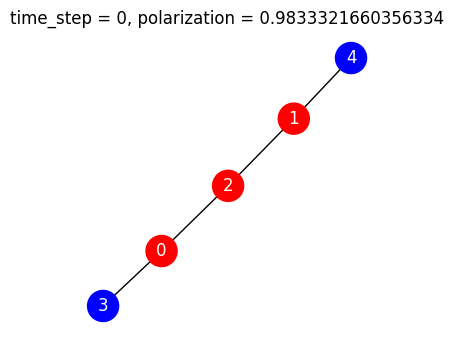

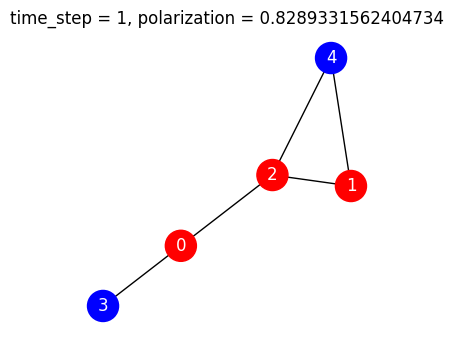

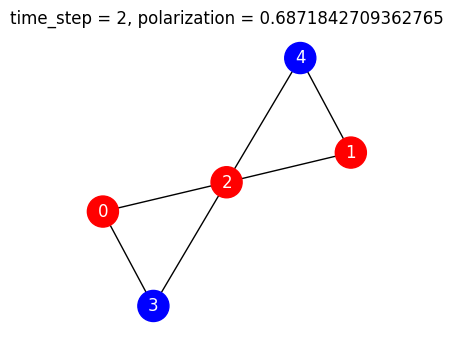

In [ ]:
import utils.visualization as vis
importlib.reload(vis)

policy = agent_dp.policy_greedy
# policy = agent_qlearning.policy_greedy

random_state = env.reset()

vis.visualize_tracetory(random_state, env, policy)